# ECG progerss Report 

The ECG contains package contains useful functions for handling the ECG data

Structure

- ecg.py
    - read_ecg
    - make_df_summary

In [62]:
# We plot 300 samples
from ECG.ecg import read_ecg, make_df_summary
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16, 8]
from scipy.signal import find_peaks
import numpy as np
import pandas as pd

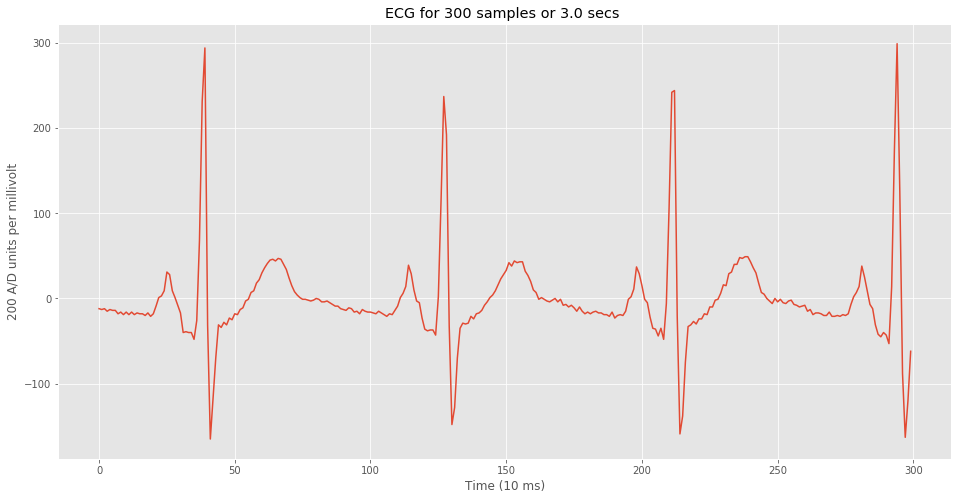

In [63]:

events = 300
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
y = read_ecg(file,0,events)

plt.plot(y)
plt.title(f"ECG for {events} samples or {events/100} secs ")
plt.xlabel('Time (10 ms)')
plt.ylabel("200 A/D units per millivolt")
plt.show()

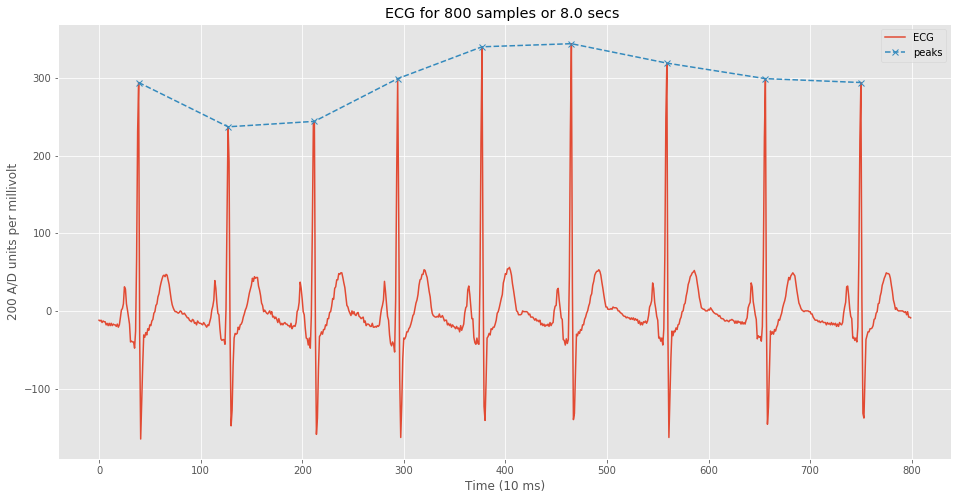

In [44]:
# Find location of peaks
events = 800
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
y = read_ecg(file,0,events)

peaks, _ = find_peaks(y, height=(100,None))

plt.plot(y,label= "ECG")
plt.plot(peaks, y[peaks],label="peaks",marker='x', linestyle='dashed')
plt.title(f"ECG for {events} samples or {events/100} secs ")
plt.xlabel('Time (10 ms)')
plt.ylabel("200 A/D units per millivolt")
plt.legend()
plt.show()

In [45]:
# Create a dataframe of features

events = 800
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
y = read_ecg(file,0,events)

Offset, dict_heights = find_peaks(y, height=(100,None))
Amplitude = dict_heights['peak_heights'] 
T = Offset/100
DT = np.append(0,np.diff(T))
DAmplitude = np.append(0,np.diff(Amplitude))
df_summary = pd.DataFrame({"Offset":Offset,
             "Amplitude":Amplitude,
             "T (sec)":T,
             "DT":DT,
             "DAmplitude":DAmplitude})
df_summary
# print(df_summary)

,Offset,Amplitude,T (sec),DT,DAmplitude
0,39,294.0,0.39,0.00,0.0
1,127,237.0,1.27,0.88,-57.0
2,212,244.0,2.12,0.85,7.0
3,294,299.0,2.94,0.82,55.0
4,377,340.0,3.77,0.83,41.0
5,465,344.0,4.65,0.88,4.0
6,559,319.0,5.59,0.94,-25.0
7,656,299.0,6.56,0.97,-20.0
8,750,294.0,7.50,0.94,-5.0


In [46]:
# Using the ECG package

events = 800
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
make_df_summary(file,0,events)

,Offset,Amplitude,T (sec),DT,DAmplitude
0,39,294.0,0.39,0.00,0.0
1,127,237.0,1.27,0.88,-57.0
2,212,244.0,2.12,0.85,7.0
3,294,299.0,2.94,0.82,55.0
4,377,340.0,3.77,0.83,41.0
5,465,344.0,4.65,0.88,4.0
6,559,319.0,5.59,0.94,-25.0
7,656,299.0,6.56,0.97,-20.0
8,750,294.0,7.50,0.94,-5.0


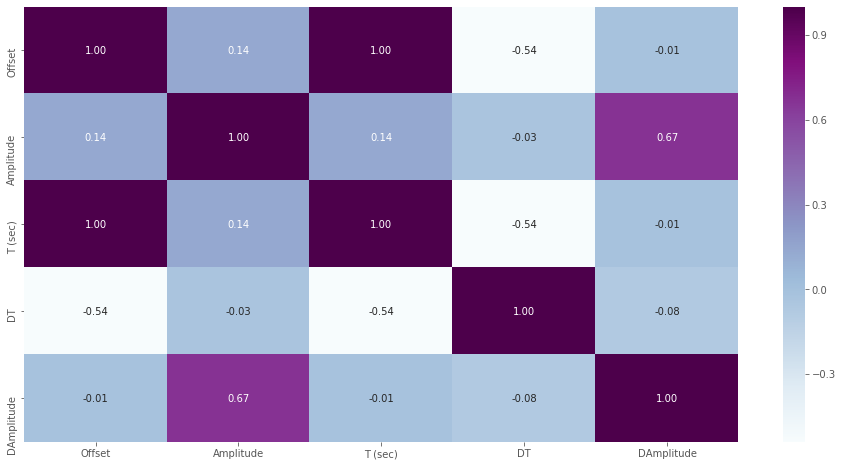

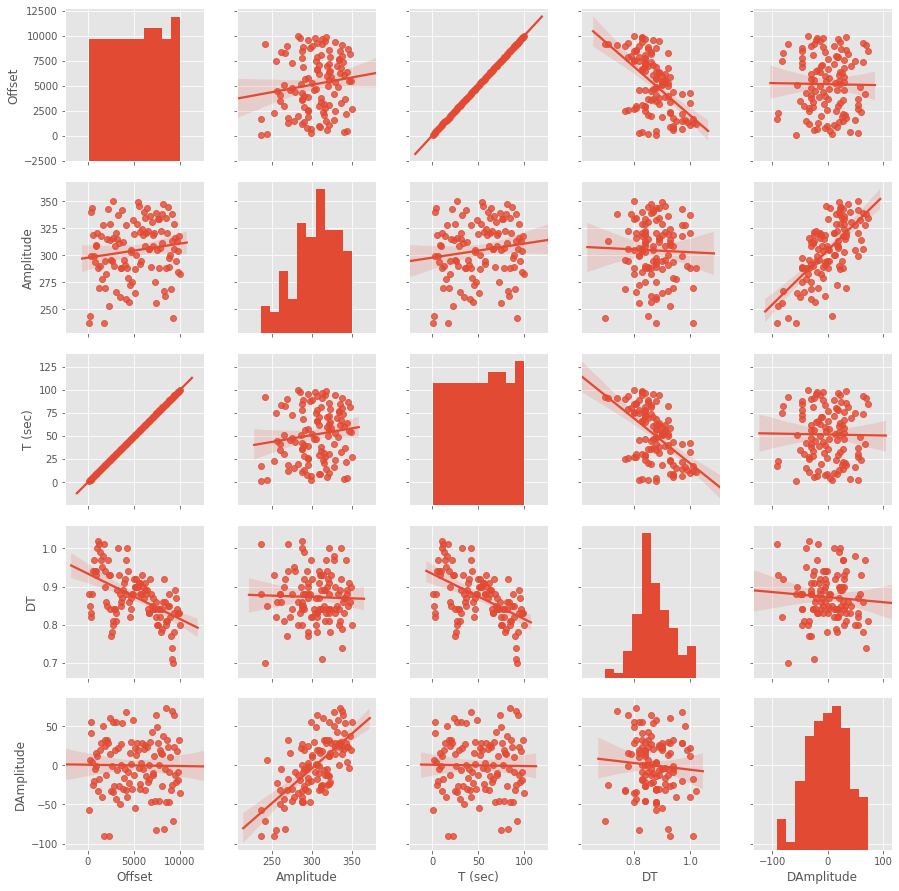

In [47]:
# find correlations

events = 100000
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
make_df_summary(file,0,events)
df = make_df_summary(file,0,events=10000)
corr = df[1:].corr()
sns.heatmap(corr, annot=True, fmt=".2f",cmap="BuPu")

sns.pairplot(df[1:],kind="reg")

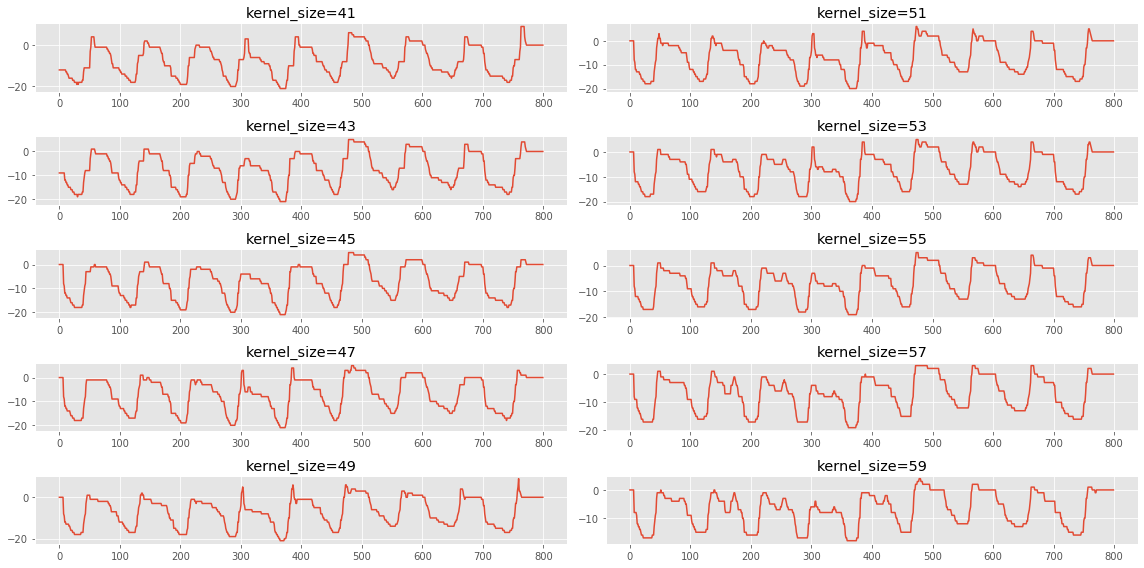

In [49]:
# Filtering

from scipy.signal import medfilt

events = 800
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
y = read_ecg(file,0,events)
    
fig, axs = plt.subplots(5, 2)
count = 41
for j in range(2):
    for i in range(5):
        fil = medfilt(y,kernel_size=count)
        ax = axs[i,j]
        ax.plot(fil)
        ax.set_title(f'kernel_size={count}')
        count += 2
plt.tight_layout()
# plt.savefig("figs/group_means_by_id")
plt.show(fig)

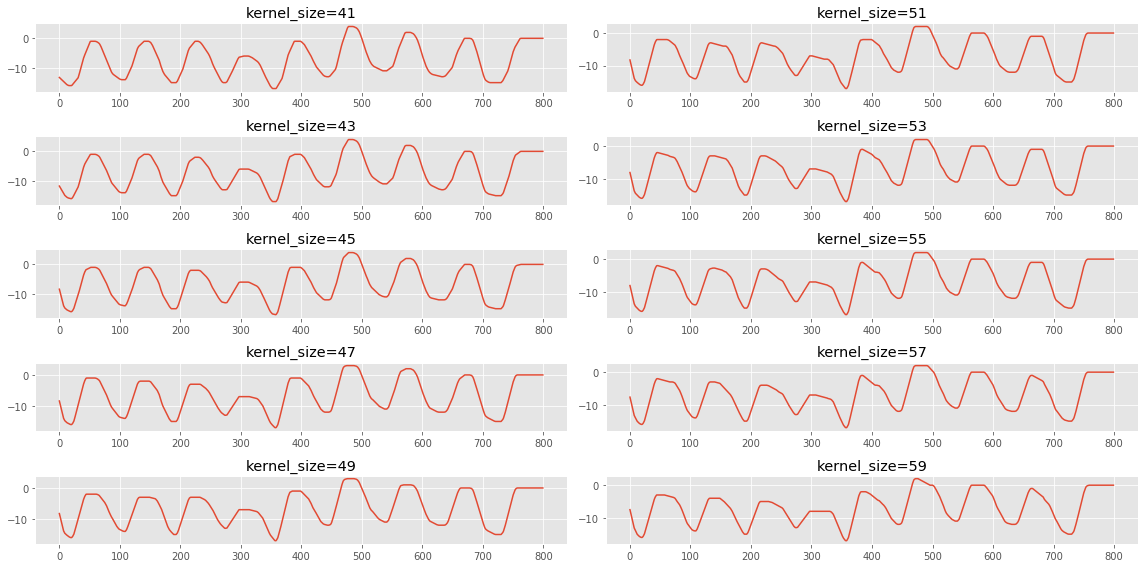

In [56]:
#  Double median Filtering second kernel_size = 41

from scipy.signal import medfilt

events = 800
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
y = read_ecg(file,0,events)
    
fig, axs = plt.subplots(5, 2)
count = 41
for j in range(2):
    for i in range(5):
        fil = medfilt(y,kernel_size=count)
        fil = medfilt(fil,kernel_size=41)
        fil = [fil[i:i+20].mean() for i in range(len(fil))]
        ax = axs[i,j]
        ax.plot(fil)
        ax.set_title(f'first filter kernel_size={count}')
        count += 2
plt.tight_layout()
# plt.savefig("figs/group_means_by_id")
plt.show(fig)

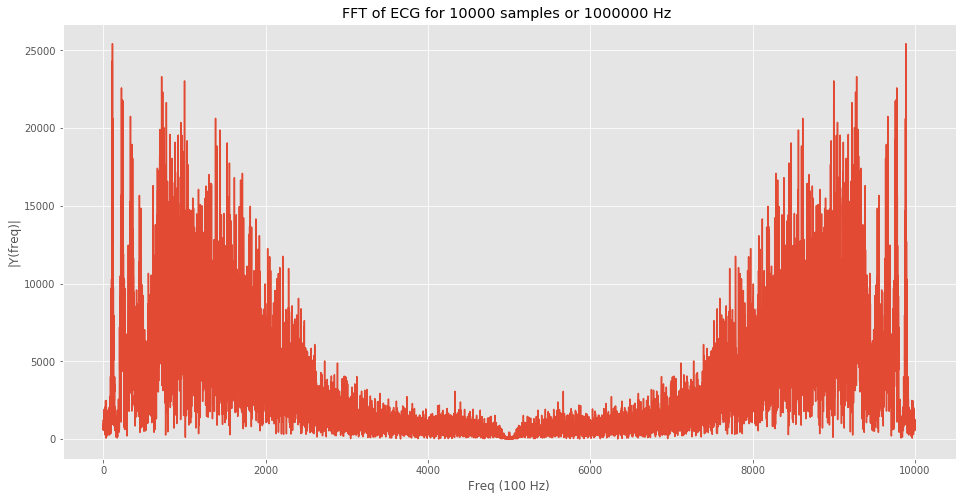

In [68]:
from scipy import fft

events = 10000
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
file = "a01.dat"
y = read_ecg(file,0,events)

plt.plot(np.abs(fft(y)))
plt.title(f"FFT of ECG for {events} samples or {events*100} Hz ")
plt.xlabel('Freq (100 Hz)')
plt.ylabel("|Y(freq)|")
plt.show()